In [1]:
# importing libraries and dependancies: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = pd.read_csv('movies.csv',error_bad_lines=False
                        ,encoding='latin1'
                        
                        #, cyrillic encoding='latin1'
                       )
#pd.read_csv('commedy_comment.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ismayiltahmazov/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Here after importing the libraries I'll explore the data to the see the various datatypes and drop rows with missing values (if any)

In [2]:
data.head()

,video_id,comment_text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,hzGrwaFztrE,Anyone reading comments before watching. I us...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hzGrwaFztrE,"""Money doesn't change people, it reveals them""?",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hzGrwaFztrE,Im not through the movie yet but that girl is ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hzGrwaFztrE,Entertaining,albeit far fetched.,NaN,NaN,NaN,NaN,NaN,NaN
4,hzGrwaFztrE,Ooooh,I wanted to see him meet his parents again... ):,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(8602, 9)

In [4]:
data = data.dropna()

In [5]:
data.shape

(2, 9)

Since only a few rows (18) had missing data, I found it better to drop those and work on the remaining data

In [6]:
data.dtypes

video_id        object
comment_text    object
Unnamed: 2      object
Unnamed: 3      object
Unnamed: 4      object
Unnamed: 5      object
Unnamed: 6      object
Unnamed: 7      object
Unnamed: 8      object
dtype: object

In [7]:
data['comment_text'].head()

132          Good movie
605    Its a good movie
Name: comment_text, dtype: object

In [8]:
# calling the function
sia = SentimentIntensityAnalyzer()

In [9]:
data['negative'] = data['comment_text'].apply(lambda x : sia.polarity_scores(x)['neg'])
data['neutral'] = data['comment_text'].apply(lambda x : sia.polarity_scores(x)['neu'])
data['positive'] = data['comment_text'].apply(lambda x : sia.polarity_scores(x)['pos'])
data['compound'] = data['comment_text'].apply(lambda x : sia.polarity_scores(x)['compound'])

In [10]:
data.head()

,video_id,comment_text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,negative,neutral,positive,compound
132,hzGrwaFztrE,Good movie,good cut,good action,and good acting. Sure,fantasy hacking (I wish it were that easy!!!),fantasy plot (the Zed character is a joke),but very entertaining with a cute little twis...,worth watching.,0.0,0.256,0.744,0.4404
605,hzGrwaFztrE,Its a good movie,the script is good and easy to follow the acteurs,but the zed person was for me a failler,so the end to,i wanted a suprisely ending in this movie. Bu...,it is a good free movie,comparing with the other shit on youtube and...,aarg i hate it!luckely i understand englisch...,0.0,0.408,0.592,0.4404


In [11]:
# Counting the positive, negative and neutral reviews : 

positive_reviews = np.sum(i > 0.4 for i in data['compound'])
neutral_reviews = np.sum(-0.4 < i < 0.4 for i in data['compound'])
negative_reviews = np.sum(i < -0.4 for i in data['compound'])
n = len(data['compound'])

/Users/ismayiltahmazov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ismayiltahmazov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.
/Users/ismayiltahmazov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


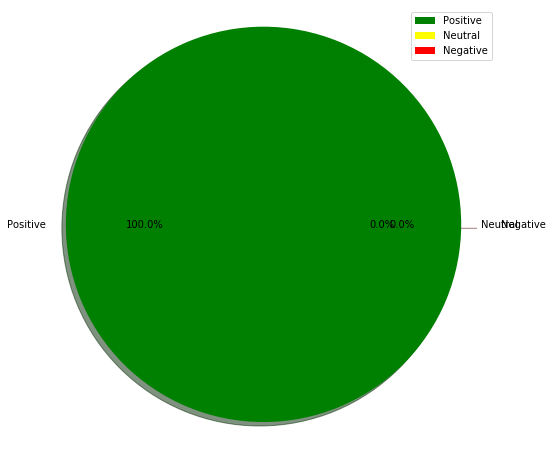

In [12]:

labels = 'Positive', 'Neutral', 'Negative'
sizes = [(positive_reviews * 100)/n, (neutral_reviews * 100)/n, (negative_reviews * 100)/n]
colors = ['green', 'yellow', 'red']
explode = (0, 0, 0.1)  # explode 1st slice

# Plot
plt.figure(figsize =(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.axis('equal') 
plt.legend()
plt.show()

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [14]:
stopwords = set(STOPWORDS)
text = " ".join(i for i in data['comment_text'])

In [15]:
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 27 words in the combination of all reviews.


In [16]:
# Generating a wordcloud image: 
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=100).generate(text)

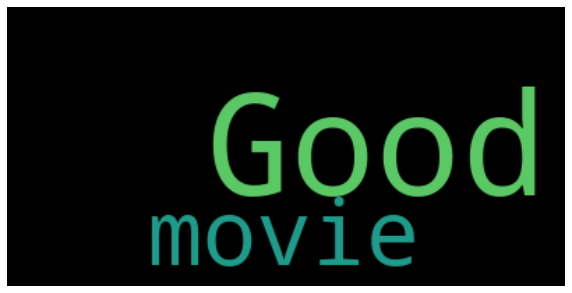

In [17]:
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()